In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Causal Discovery Methods for Time Series
Graphical models are a popular way to understand large and complex datasets. In particular, with the growing need for interpretable models and causal insights into underlying processes, directed acyclic graphs (DAGs) have been shown to be promising in a wide variety of applications.

The inter-relationship between variables in a system can be revealed by examining the edges within a DAG. In cases where these edges cannot be determined based on prior knowledge, structure learning is necessary, namely causal graph discovery based on data.

## Case Study: Industrial Biomass Boiler

Here we have time series data from a biomass boiler as a real-world industrial process dataset.
The boiler is designed to burn waste woods and produce steam for industrial purposes. We monitor all parts of the process with multivariate sensors to ensure that it is operating as intended. Illustrated in the figure below (system visualization section) is the diagram of this complex system, highlighting the strategic placement of sensors across all stages of the process. The utilization of sensors enables the acquisition of data in real-time, serving as a critical element in enhancing both the performance and reliability of the system. In this complex industrial system, there are 12 different types of sensors, each measuring a different parameter.

| Unit | Unit | Measured values |
| --- | :---: | ---: |
| % | percentage | Valve opening percentage |
| °C | Celcius | Temperature |
| mm | millimetre | Steam drum level |
| s | second | Time period |
| Pa | Pascal | Pressure |
| Hz | Hertz | Frequency setting of fans |
| Co | ppm | Carbon monoxide level |
| bar | bar | Pressure in bars |
| A | Ampere | Electric current |
| kW | Kilowatt | Thermal power |
| m3/h | cubic meters per hour | Volumetric mass flow rate |
| t/h | tonnes per hour | Mass flow rate |

## System Visualization
Here we visualize the diagram of the biomass boiler system. Sensors are displayed as nodes; each color represents a different type of sensor.

Text(0.5, 1.0, 'System Diagram')

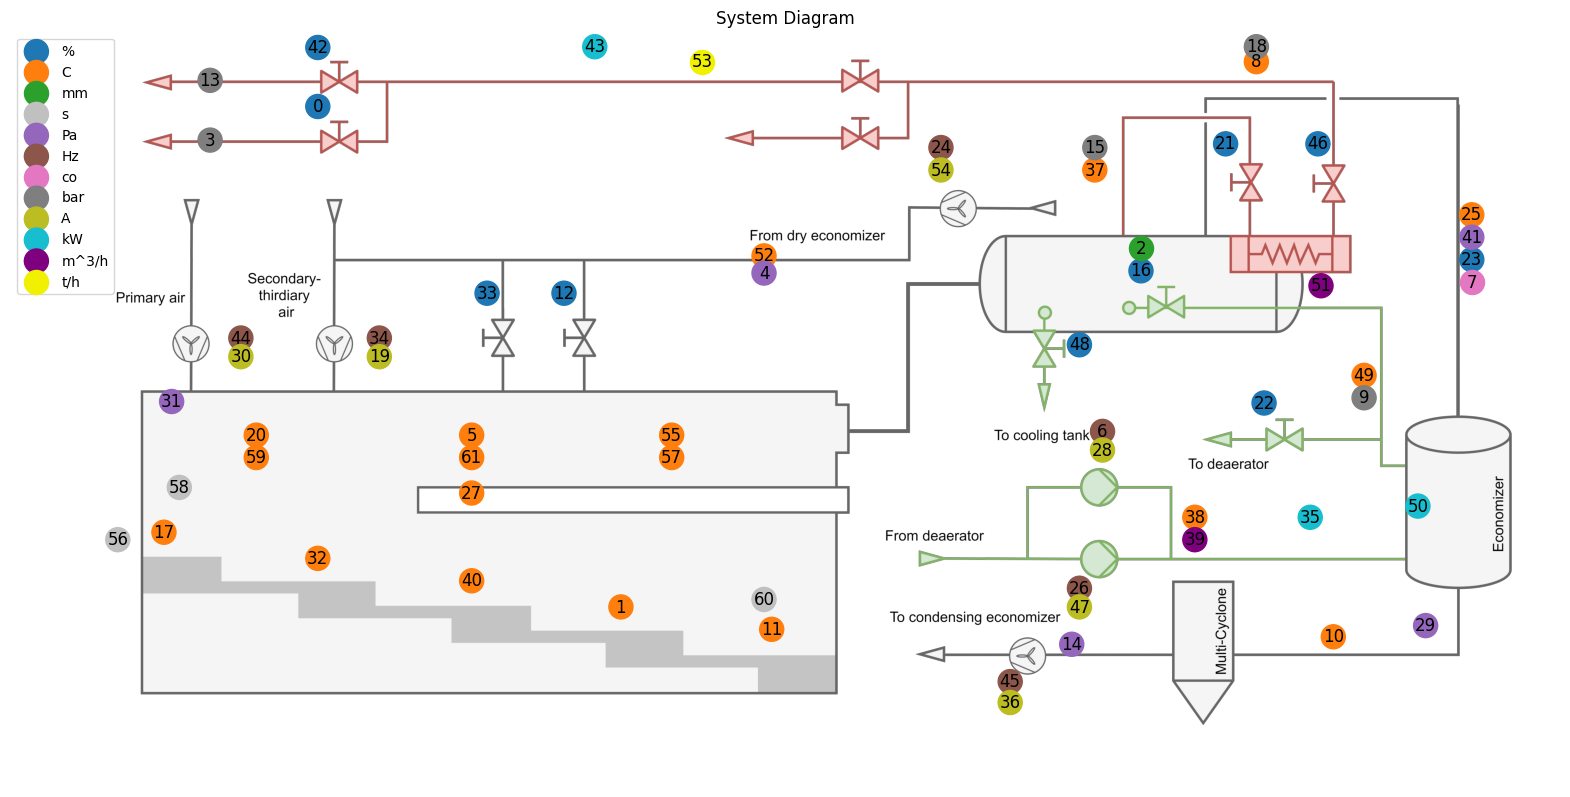

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/sensorlists.csv',index_col=0)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#c0c0c0', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#7f007f', '#f0f000']#d62728
plt.figure(figsize=(20,20))
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/amir/ESAS/Boiler/EA - Dashboard Boiler scada view_files/6465')
plt.imshow(img)
for j in range(12):
  pos={}
  c={}
  G=nx.DiGraph()
  for i in range(62):
    if int(df.iloc[i,3])==j:
      G.add_node(i)
      pos[i]=((df.iloc[i,1]+1)*103,(df.iloc[i,2]+1)*50)
      c[i]=colors[int(df.iloc[i,3])]
  nx.draw(G,pos=pos,with_labels=True,node_color=c.values())
plt.legend(['%','C','mm','s','Pa','Hz','co','bar','A','kW','m^3/h','t/h'])
plt.title('System Diagram')

# Data inspection
Data has been collected from 62 sensors embedded in the biomass boiler over a period of one month from 2022.12.12 to 2023.01.11. The sample rate for all sensors is one minute. In total, we have 43200 samples for each sensor.

The full data is not publicly available at this time, and only a portion of the data is shown as an example.

In [ ]:
import pandas as pd
pd.set_option('display.max_columns',None)
data=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/data.csv',index_col=None,header=None)
data.head()

0           1           2         3           4           5    6   \
0  60.338287  117.129631  235.966431  3.384259  789.972534  881.944397  0.0   
1  60.338287  117.129631  234.085648  3.412037  790.605835  890.277771  0.0   
2  60.338287  117.361107  234.809021  3.430556  799.624634  886.111084  0.0   
3  60.338287  117.476852  240.451385  3.425926  791.550537  887.152771  0.0   
4  60.338287  117.592590  238.281250  3.412037  795.265015  889.583313  0.0   

    7           8          9           10          11         12         13  \
0  0.0  231.684021  21.805555  174.074066  117.476852  98.366104  19.606482   
1  0.0  232.725693  21.388887  173.958328  117.476852  98.366104  19.652777   
2  0.0  233.246521  21.273148  173.842590  117.592590  98.366104  19.583332   
3  0.0  233.333328  21.828703  173.842590  117.708328  98.366104  19.386574   
4  0.0  233.159714  21.354166  173.842590  117.708328  98.366104  19.317129   

            14         15         16          17         18         19  \
0 -2432.663574  20.462963  45.746529  115.972221  20.000000  14.330000   
1 -2467.437988  20.555555  44.155090  116.203705  20.092592  12.120000   
2 -2437.531982  20.625000  46.903934  116.435181  20.162037  14.620000   
3 -2512.887451  20.706018  46.875000  116.782402  20.219906  15.549999   
4 -2459.497559  20.717592  46.238426  116.898148  20.219906  14.690000   

           20         21        22        23         24          25  \
0  859.201416  99.638313  4.571759  5.298611  42.999268  198.611099   
1  857.581055  99.602142  4.600694  5.796875  42.999268  198.437500   
2  856.770813  99.602142  4.629630  5.395833  42.999268  198.263885   
3  855.555542  99.565971  4.571759  5.493056  42.999268  198.350693   
4  853.530090  99.602142  4.571759  5.493056  42.999268  198.437500   

          26          27   28           29        30         31          32  \
0  39.520264  790.625000  0.0 -1816.030762  7.860000  96.643517  119.328705   
1  39.102173  790.625000  0.0 -1843.065674  8.260000  96.354164  119.675926   
2  39.633179  790.625000  0.0 -1821.158203  8.290000  95.486115  119.907402   
3  39.190674  790.625000  0.0 -1871.964600  8.179999  94.328705  120.138885   
4  39.715576  790.277771  0.0 -1833.990234  8.620000  92.881943  120.370369   

          33         34      35          36          37          38        39  \
0  97.716896  30.374146  1098.0  113.540001  217.708328  102.025459  9.260000   
1  97.716896  27.331543  1079.0  105.180000  217.881943  102.083328  9.090000   
2  97.716896  30.606079  1077.0  113.959999  217.968735  102.083328  9.080000   
3  97.716896  32.440186  1100.0  109.129997  218.142349  102.083328  9.270000   
4  97.716896  31.304932  1085.0  104.299995  218.315964  102.141205  9.139999   

           40           41         42        43         44         45  \
0  123.263885 -1312.205078  42.274597  5.999516  20.104980  29.934692   
1  123.611107 -1332.027344  39.431351  5.844252  19.992065  29.531860   
2  123.842590 -1314.599121  36.079311  5.892582  19.982910  29.922485   
3  124.074074 -1349.713379  34.104004  5.905327  19.888306  30.316162   
4  124.421295 -1322.290771  34.762440  6.201103  19.885254  29.757690   

          46         47        48          49     50        51          52  \
0  99.276619  44.719997  8.564815  150.954849  527.0  9.265368  172.685181   
1  99.168114  37.169998  8.564815  151.041656  518.0  9.098081  172.569443   
2  99.240456  46.090000  8.564815  151.128464  518.0  9.086399  172.569443   
3  99.276619  42.250000  8.564815  151.128464  528.0  9.272645  172.569443   
4  99.204285  44.930000  8.564815  151.128464  522.0  9.149184  172.685181   

         53         54          55     56     57    58     59    60     61  
0  7.508681  20.359999  755.497681  117.0  948.0  30.0  960.0  29.0  950.0  
1  7.369792  20.859999  753.877319  118.0  948.0  31.0  960.0  29.0  950.0  
2  7.404514  20.029999  751.851868  119.0  948.0  31.0  960.0  29.0  950.0  
3  7.63888

Figure below shows the measured values of three different sensors (temperature, pressure and power) of the system for three consecutive days from 2023.01.05 to 2023.01.08, specifically sensor number 3, 40 and 50.

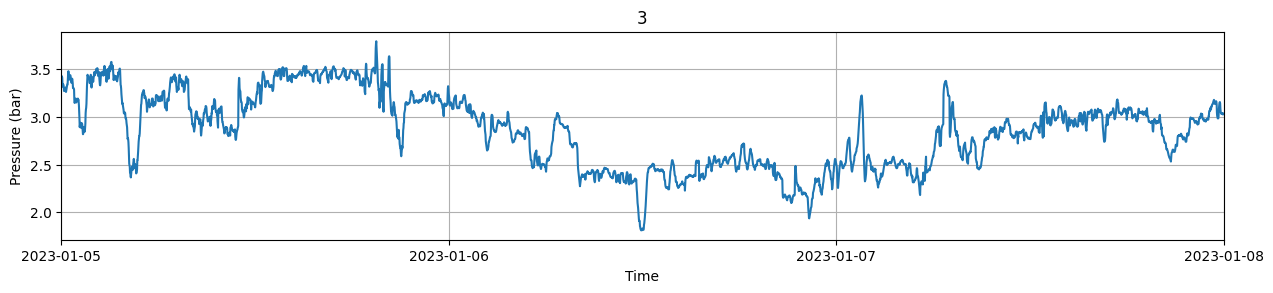

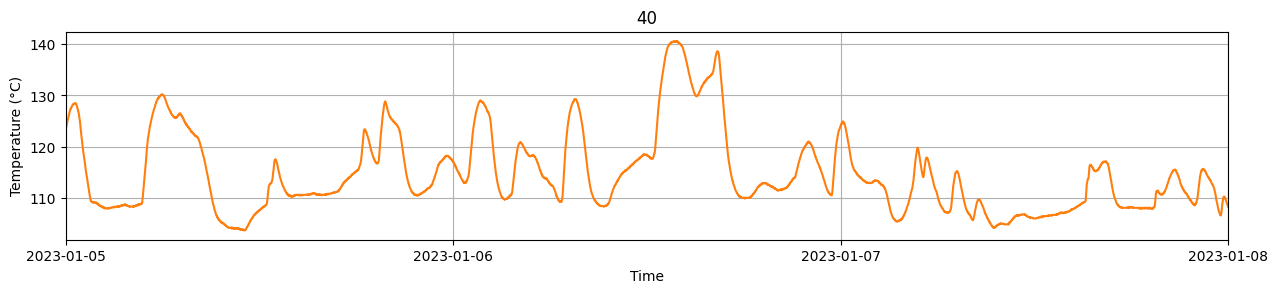

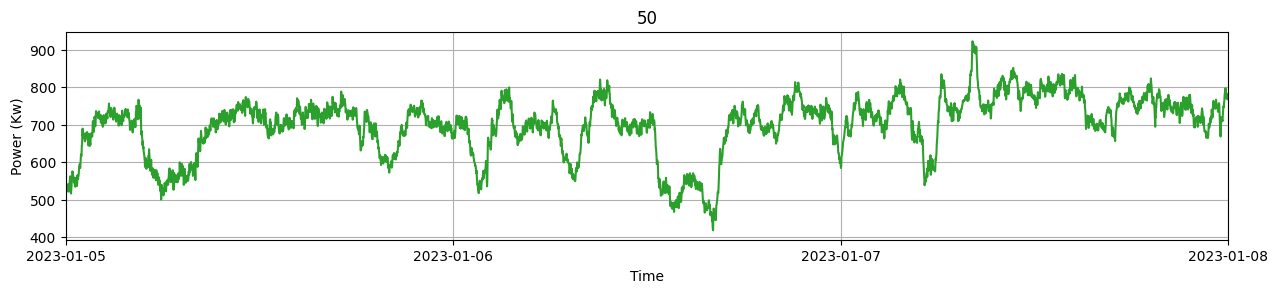

In [ ]:
u=2880+1440
l=0
cnt=0
yl=['Pressure (bar)','Temperature (°C)','Power (Kw)']
for i in [3,40,50]:
    plt.figure(figsize=(15,2.7))
    plt.title(i)
    plt.plot(data.iloc[l:u,i],colors[cnt])
    plt.xticks([0,1440,2880,4320],['2023-01-05','2023-01-06','2023-01-07','2023-01-08'])
    plt.xlim([0,4320])
    plt.grid()
    plt.xlabel('Time')
    plt.ylabel(yl[cnt])
    cnt+=1

# Gcastle ToolBox
*Gcastle* is a causal structure learning toolchain developed by Huawei Noah's Ark Lab. This library contains 18 different methods for causal graph discovery from time series data, including:
* PC (A classic causal discovery algorithm based on conditional independence tests)
* NOTEARS (A gradient-based algorithm for linear data models (typically with least-squares loss))
* DAG-GNN (DAG Structure Learning with Graph Neural Networks)
* DirectLiNGAM (A direct learning algorithm for linear non-Gaussian acyclic model (LiNGAM))
* GraNDAG (A gradient-based algorithm using neural network modeling for non-linear additive noise data)
* TTPM (A causal structure learning algorithm based on Topological Hawkes process for spatio-temporal event sequences)


For more you can check [here](https://pypi.org/project/gcastle/).

In the below code cell, we are installing this library.

In [ ]:
!pip install gcastle==1.0.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.9/214.9 kB 12.8 MB/s eta 0:00:00


# Algorithms

Here, we utilize four different methods to discover the causal graph form time series data, and then we examine these graphs from the perspective of expert knowledge. Following are the four methods used:
* Directed Lingam
* DAG-GNN
* NotearsNonlinear
* Weighted DAG-GNN

## Directed Lingam

DirectLiNGAM [1] is a direct method for learning the basic LiNGAM model [2]. It uses an entropy-based measure [3] to evaluate independence between error variables. The basic LiNGAM model makes the following assumptions.


*   Linearity
*   Non-Gaussian continuous error variables
*   Acyclicity
*   No hidden common causes

Denote observed variables by $x_{i}$
 and error variables by $e_{i}$
 and coefficients or connection strengths $b_{ij}$
. Collect them in vectors $x$
 and $e$
 and a matrix $\text{B}$
, respectivelly. Due to the acyclicity assumption, the adjacency matrix $\text{B}$
 can be permuted to be strictly lower-triangular by a simultaneous row and column permutation. The error variables $e_{i}$
 are independent due to the assumption of no hidden common causes.

Then, mathematically, the model for observed variable vector $x$
 is written as

$x=\text{B}x+e.$



**References**

    ----------
  [1]	S. Shimizu, T. Inazumi, Y. Sogawa, A. Hyvärinen, Y. Kawahara, T. Washio, P. O. Hoyer and K. Bollen. DirectLiNGAM: A direct method for learning a linear non-Gaussian structural equation model. Journal of Machine Learning Research, 12(Apr): 1225–1248, 2011.

[2]	S. Shimizu, P. O. Hoyer, A. Hyvärinen, and A. J. Kerminen. A linear non-gaussian acyclic model for causal discovery. Journal of Machine Learning Research, 7:2003-2030, 2006.

[3]	A. Hyvärinen and S. M. Smith. Pairwise likelihood ratios for estimation of non-Gaussian structural eauation models. Journal of Machine Learning Research 14:111-152, 2013.

[4]	J. Kotoku, A. Oyama, K. Kitazumi, H. Toki, A. Haga, R. Yamamoto, M. Shinzawa, M. Yamakawa, S. Fukui, K. Yamamoto, T. Moriyama. Causal relations of health indices inferred statistically using the DirectLiNGAM algorithm from big data of Osaka prefecture health checkups. PLoS ONE,15(12): e0243229, 2020.

 In the code cell below, we implement DirectLiNGAM using Gcastle library and display the obtained causal graph adjacency matrix.

/usr/local/lib/python3.10/dist-packages/castle/algorithms/lingam/direct_lingam.py:228: RuntimeWarning: invalid value encountered in true_divide
  xj_std = (X[:, j] - np.mean(X[:, j])) / np.std(X[:, j])
/usr/local/lib/python3.10/dist-packages/castle/algorithms/lingam/direct_lingam.py:227: RuntimeWarning: invalid value encountered in true_divide
  xi_std = (X[:, i] - np.mean(X[:, i])) / np.std(X[:, i])
/usr/local/lib/python3.10/dist-packages/castle/algorithms/lingam/direct_lingam.py:163: RuntimeWarning: invalid value encountered in double_scalars
  return xi - (np.cov(xi, xj)[0, 1] / np.var(xj)) * xj
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2306: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2307: RuntimeWarning: invalid value encountered in true_divide
  + residuals_sum_squares / self.noise_variance_
/usr/local/lib/py

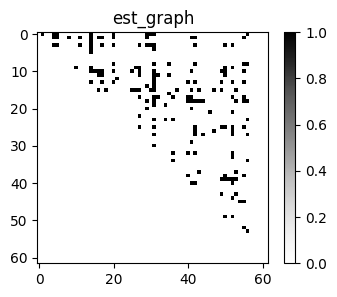

In [ ]:
from castle.common import GraphDAG

from castle.algorithms import DirectLiNGAM


X = pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/data.csv',index_col=None,header=None).to_numpy()
# DirectLiNGAM learn
g = DirectLiNGAM()
g.learn(X[:120,:])

# plot dag
GraphDAG(g.causal_matrix)


171


Text(0.5, 1.0, 'DLingam causal Graph')

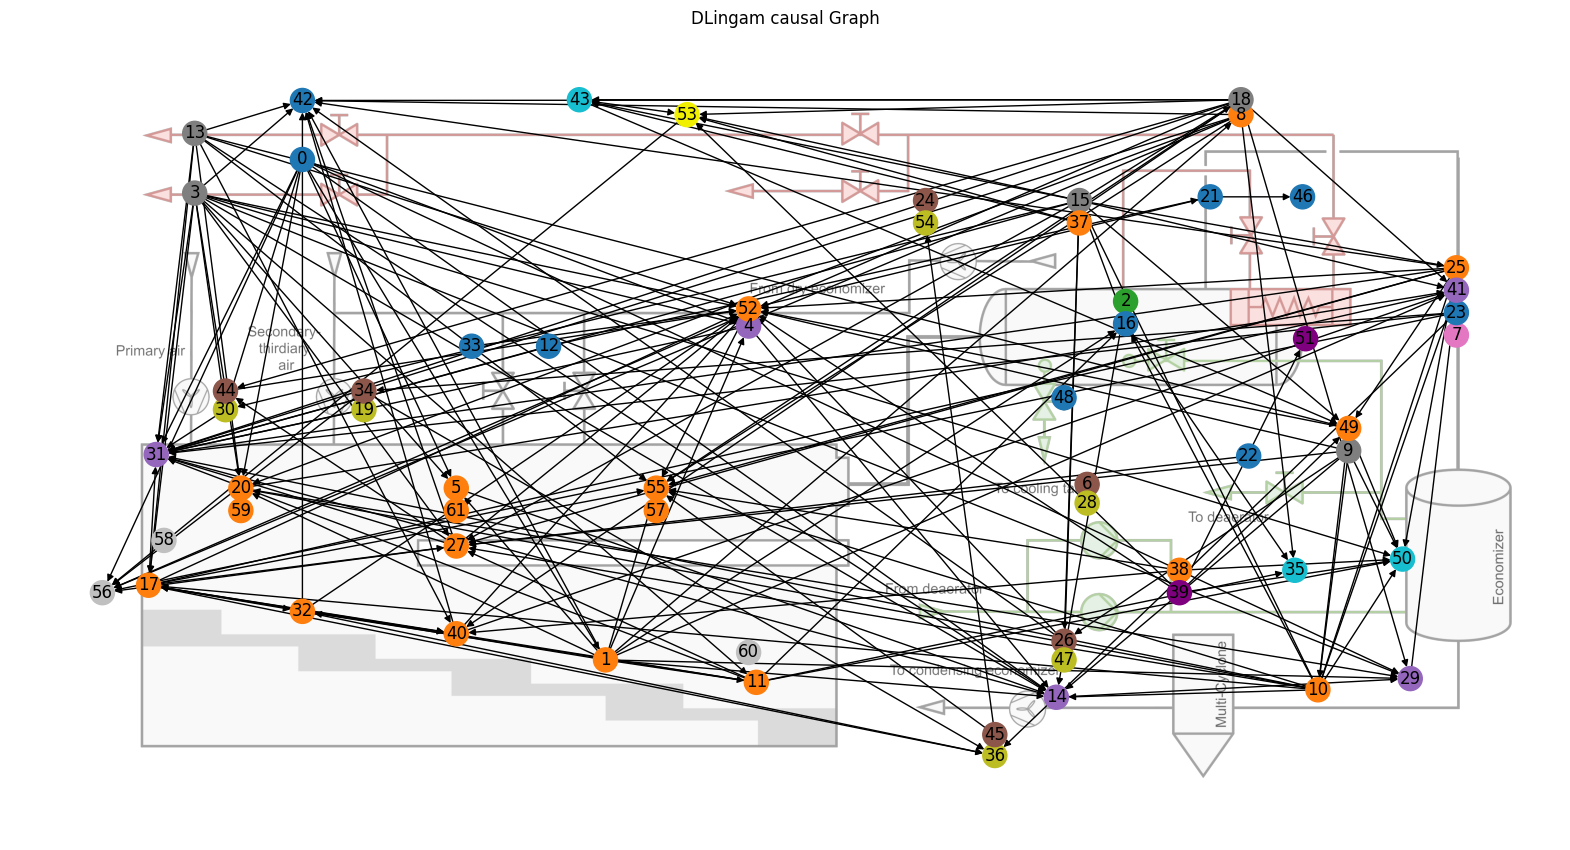

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/sensorlists.csv',index_col=0)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

adj=g.causal_matrix
G=nx.DiGraph()
G.add_nodes_from(range(len(adj)))
pos={}
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#c0c0c0', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#7f007f', '#f0f000']#d62728
c={}
for i in range(62):
  pos[i]=(df.iloc[i,1]*103,(df.iloc[i,2]+1)*50)
  c[i]=colors[int(df.iloc[i,3])]

plt.figure(figsize=(20,20))
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/amir/ESAS/Boiler/EA - Dashboard Boiler scada view_files/6465')
img[:,:,3]= img[:,:,3]-0.4
plt.imshow(img)

# nx.draw_networkx_nodes(G,pos,node_color=c.values())
nx.draw(G,pos,node_color=c.values(),with_labels=True)
cnt=0
for i in range(len(adj)):
  for j in range(len(adj)):
    if adj[i,j]==1:
      G.add_edge(i,j,weight=adj[i,j])
      cnt+=1
print(cnt)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
plt.title('DLingam causal Graph')

The **Direct Lingam Causal Graph** is shown above. We can see from this graph which variable affects the other variables in this industrial system. Since the system is highly complex and there are many sensors, it is difficult to interpret the graph. In order to further analyze it, we filter it for some specific sensors.
Sensor numbers 20 and 55 are important sensors because they input and output of the burning process. Additionally, sensor number 29 was also chosen.  

7


Text(0.5, 1.0, 'DLingam causal Graph')

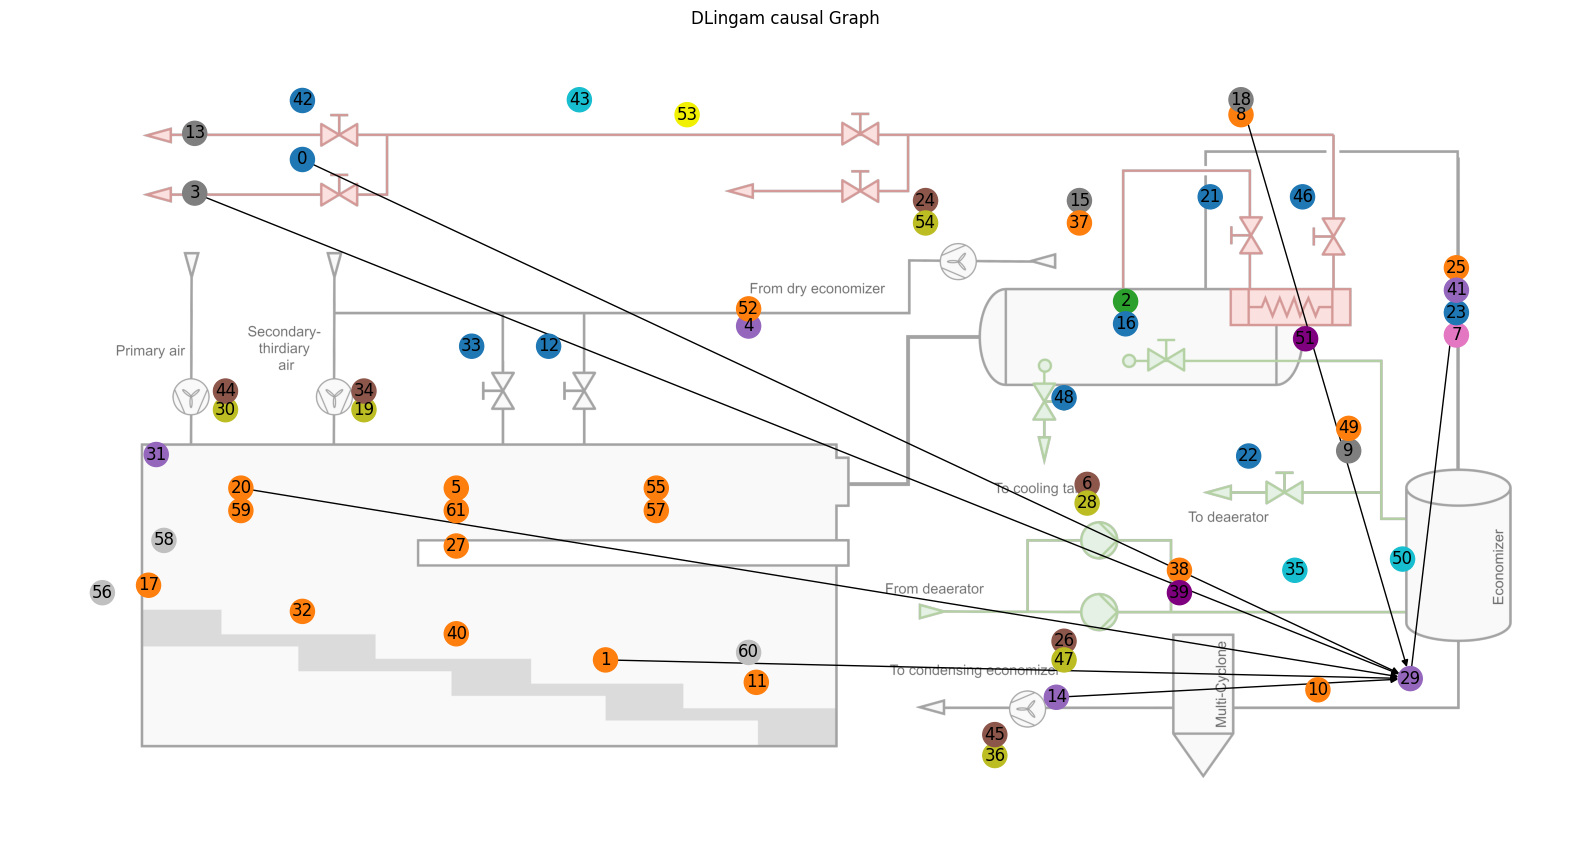

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/sensorlists.csv',index_col=0)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
adj=g.causal_matrix
G=nx.DiGraph()
G.add_nodes_from(range(len(adj)))
pos={}
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#c0c0c0', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#7f007f', '#f0f000']#d62728
c={}
for i in range(62):
  pos[i]=(df.iloc[i,1]*103,(df.iloc[i,2]+1)*50)
  c[i]=colors[int(df.iloc[i,3])]

plt.figure(figsize=(20,20))
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/amir/ESAS/Boiler/EA - Dashboard Boiler scada view_files/6465')
img[:,:,3]= img[:,:,3]-0.4
plt.imshow(img)
nx.draw(G,pos,node_color=c.values(),with_labels=True)
cnt=0
for i in range(len(adj)):
  for j in range(len(adj)):
    if df.iloc[i,0]=='push bk2wincc:bk2:K2W07-BP2_MV' or\
    df.iloc[j,0]=='push bk2wincc:bk2:K2W07-BP2_MV':
      if adj[i,j]==1:
        G.add_edge(i,j,weight=adj[i,j])
        cnt+=1
print(cnt)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
plt.title('DLingam causal Graph')

The above figure shows only the filtered graph for sensor number 29. The unit of measurement for this sensor is the pascal. The sensor is located in the outlet channel after the economizer. As a result of analysis and expert opinion, this graph represents the following links appropriately:

1 ---> 29

20 ---> 29

7 ---> 29

In order to check all the edges, we need to conduct a more detailed industrial examination. 

The next step is to draw the graph for two additional target sensors. In this particular instance, sensor 20, which measures the temperature inside the burner, can be considered as the inlet temperature. In contrast, sensor 55 can be considered the outlet temperature, which is sent to the boiler part.  The following is a DAG graph for these two sensors.

18


Text(0.5, 1.0, 'DLingam causal Graph')

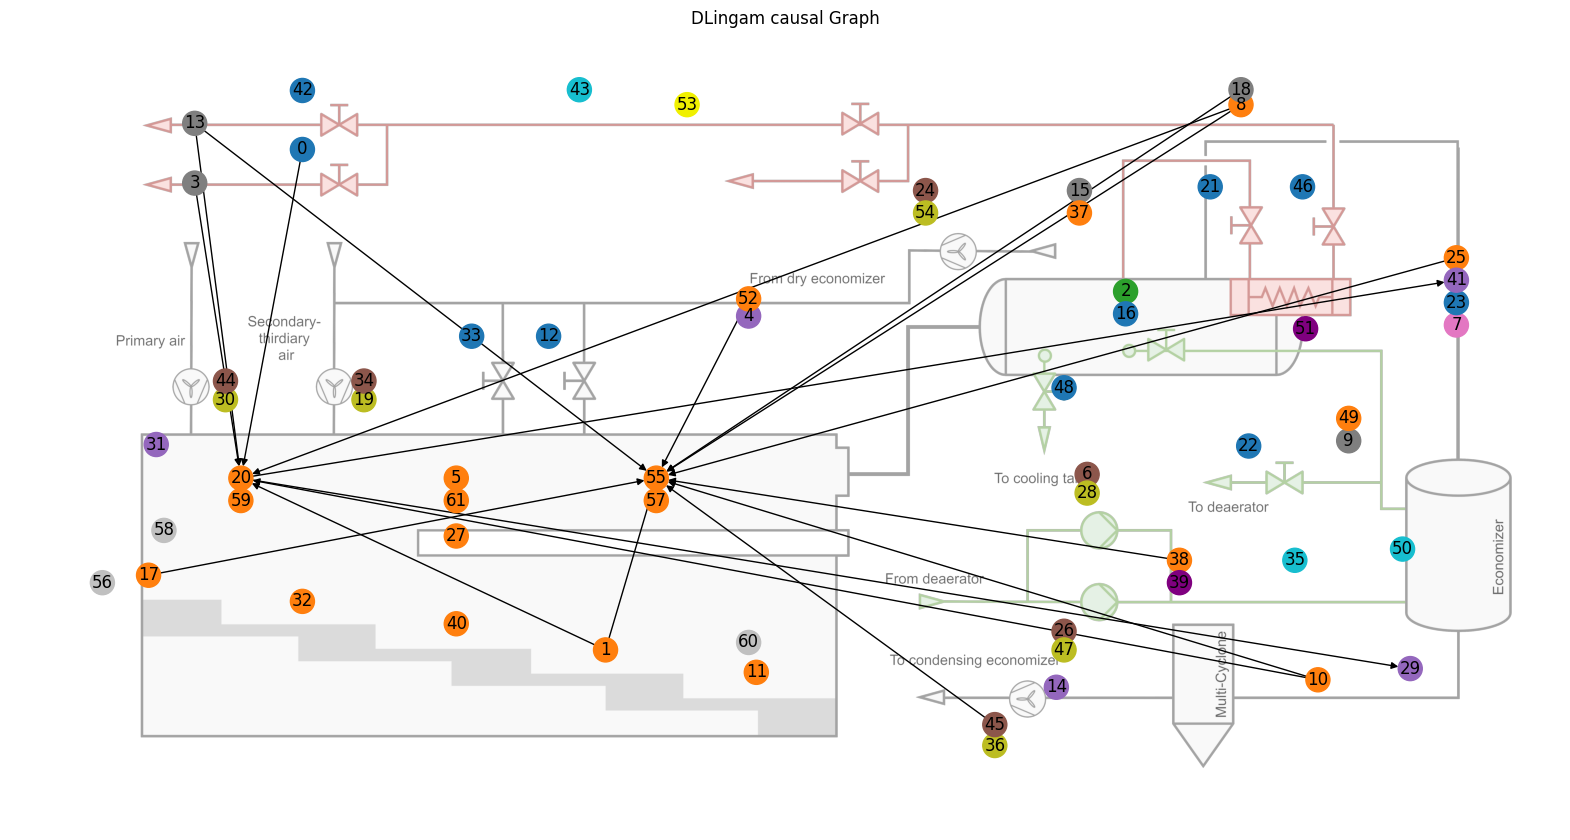

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/sensorlists.csv',index_col=0)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
adj=g.causal_matrix
G=nx.DiGraph()
G.add_nodes_from(range(len(adj)))

pos={}
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#c0c0c0', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#7f007f', '#f0f000']#d62728
c={}
for i in range(62):
  pos[i]=(df.iloc[i,1]*103,(df.iloc[i,2]+1)*50)
  c[i]=colors[int(df.iloc[i,3])]

plt.figure(figsize=(20,20))
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/amir/ESAS/Boiler/EA - Dashboard Boiler scada view_files/6465')
img[:,:,3]= img[:,:,3]-0.4
plt.imshow(img)
nx.draw(G,pos,node_color=c.values(),with_labels=True)
cnt=0
for i in range(len(adj)):
  for j in range(len(adj)):
    if df.iloc[i,0]=='push bk2wincc:bk2:K2E1-BT1_MV' or\
    df.iloc[i,0]=='push bk2wincc:bk2:K2E1-BT3_MV' or\
    df.iloc[j,0]=='push bk2wincc:bk2:K2E1-BT1_MV' or\
    df.iloc[j,0]=='push bk2wincc:bk2:K2E1-BT3_MV': 
      if adj[i,j]==1:
        G.add_edge(i,j,weight=adj[i,j])
        cnt+=1
print(cnt)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
plt.title('DLingam causal Graph')

As a result of analysis and expert opinion, DLingam causal graph represents the following links appropriately:

1 ---> 20

1 ---> 55

10---> 41

Based on the industrial process, it appears that the direction of other edges should be opposite, and this graph is not the most appropriate causal graph for our purposes. Therefore, we intend to explore other approaches as well.

## DAG-GNN
DAG-GNN [1] is a new method for structure learning that utilizes neural networks. At the heart of the DAG-GNN model there is a variational autoencoder parameterized by graph neural network.

References

    ----------
[1] Yu, Yue, et al. "DAG-GNN: DAG structure learning with graph neural networks." International Conference on Machine Learning. PMLR, 2019.

 In the code cell below, we implement DAG-GNN using Gcastle library and display the obtained causal graph adjacency matrix.

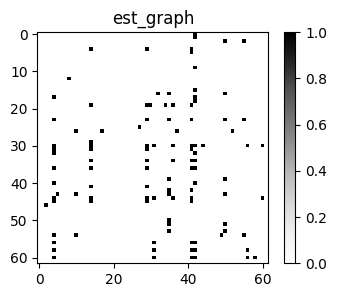

In [ ]:
import os
os.environ['CASTLE_BACKEND'] ='pytorch'

from castle.common import GraphDAG
from castle.algorithms import DAG_GNN


X = pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/data.csv',index_col=None,header=None).to_numpy()
# rl learn
gnn = DAG_GNN(device_type='gpu')
gnn.learn(X[:60,:])

# plot dag
GraphDAG(gnn.causal_matrix)


109


Text(0.5, 1.0, 'Dag-gnn causal Graph')

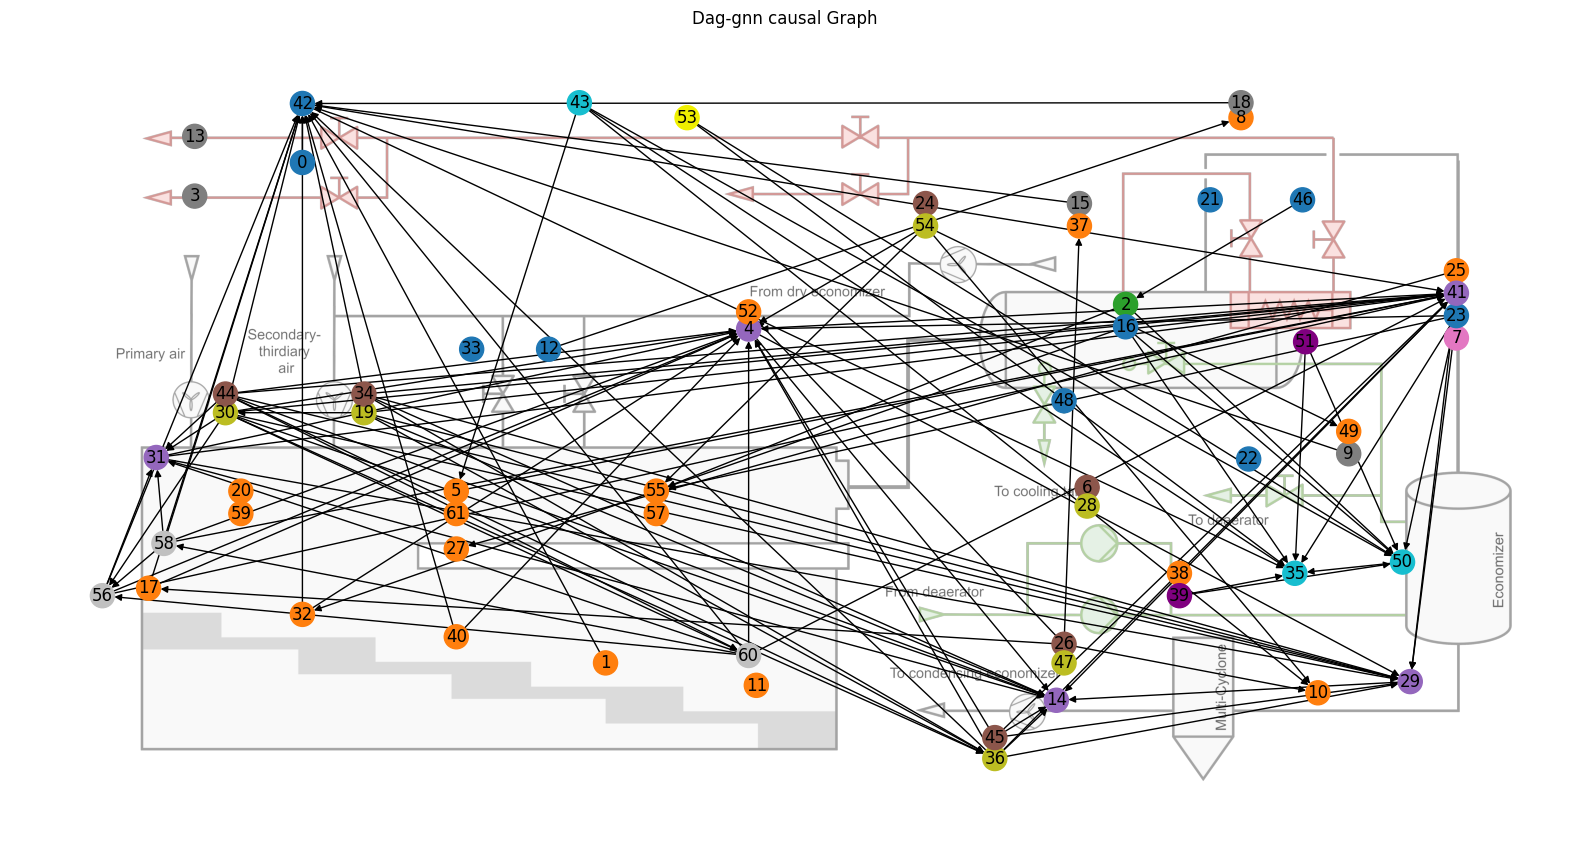

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/sensorlists.csv',index_col=0)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

adj=gnn.causal_matrix
G=nx.DiGraph()
G.add_nodes_from(range(len(adj)))

pos={}
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#c0c0c0', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#7f007f', '#f0f000']#d62728
c={}
for i in range(62):
  pos[i]=(df.iloc[i,1]*103,(df.iloc[i,2]+1)*50)
  c[i]=colors[int(df.iloc[i,3])]

plt.figure(figsize=(20,20))
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/amir/ESAS/Boiler/EA - Dashboard Boiler scada view_files/6465')
img[:,:,3]= img[:,:,3]-0.4
plt.imshow(img)

nx.draw(G,pos,node_color=c.values(),with_labels=True)
cnt=0
for i in range(len(adj)):
  for j in range(len(adj)):
    if adj[i,j]==1:
      G.add_edge(i,j,weight=adj[i,j])
      cnt+=1
print(cnt)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
plt.title('Dag-gnn causal Graph')

The **DAG-GNN Causal Graph** is shown above. Like before, in order to further analyze it, we filter it first for sensor number 29 and then for two target sensors in the burner 20 and 55.

11


Text(0.5, 1.0, 'Dag-gnn causal Graph')

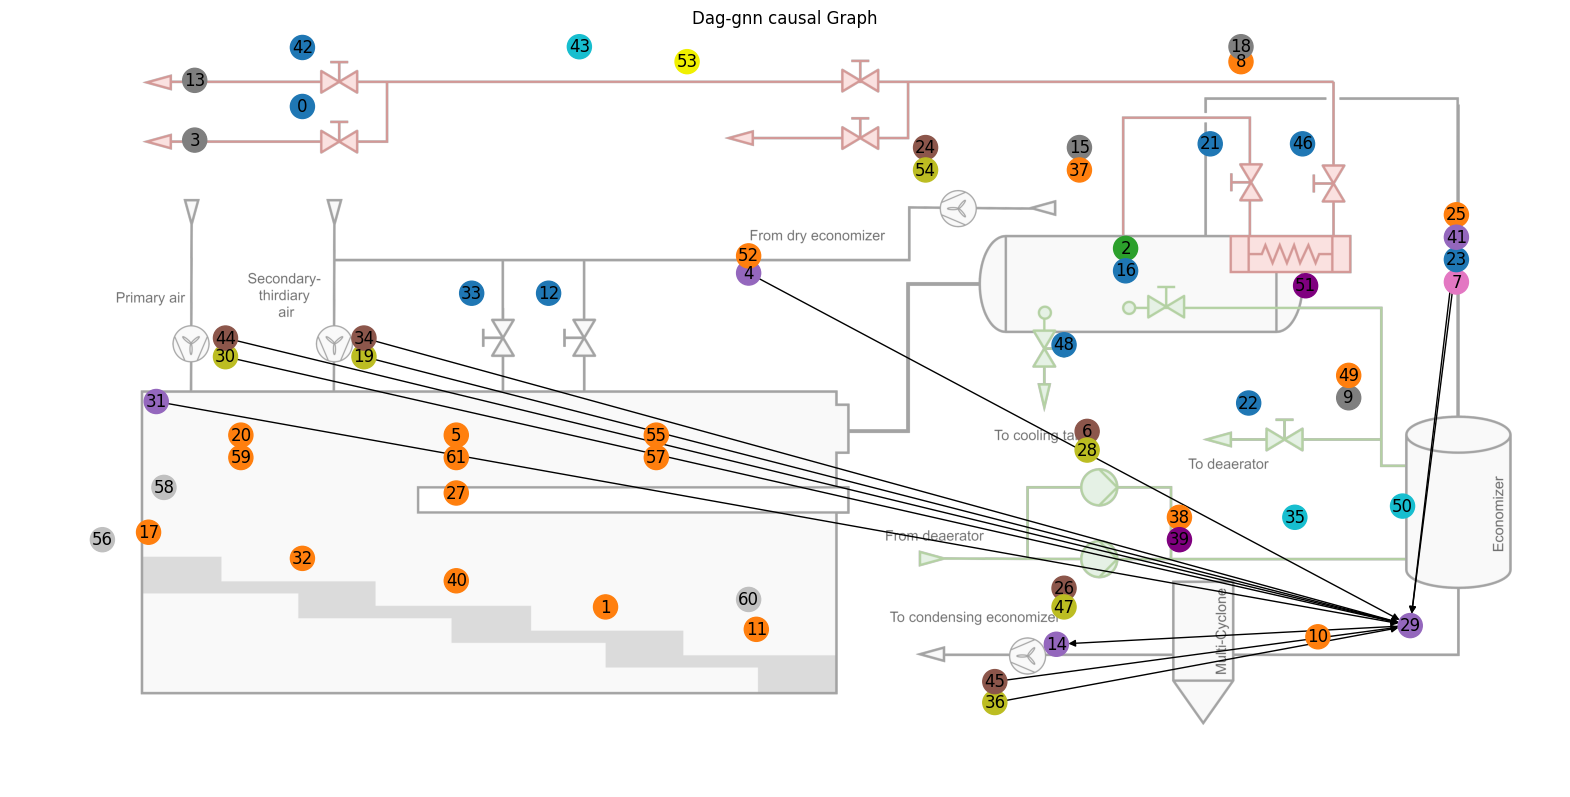

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/sensorlists.csv',index_col=0)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
adj=gnn.causal_matrix
G=nx.DiGraph()
G.add_nodes_from(range(len(adj)))

pos={}
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#c0c0c0', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#7f007f', '#f0f000']#d62728
c={}
for i in range(62):
  pos[i]=(df.iloc[i,1]*103,(df.iloc[i,2]+1)*50)
  c[i]=colors[int(df.iloc[i,3])]

plt.figure(figsize=(20,20))
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/amir/ESAS/Boiler/EA - Dashboard Boiler scada view_files/6465')
img[:,:,3]= img[:,:,3]-0.4
plt.imshow(img)
nx.draw(G,pos,node_color=c.values(),with_labels=True)
cnt=0
for i in range(len(adj)):
  for j in range(len(adj)):
    if df.iloc[i,0]=='push bk2wincc:bk2:K2W07-BP2_MV' or\
    df.iloc[j,0]=='push bk2wincc:bk2:K2W07-BP2_MV':
      if adj[i,j]==1:
        G.add_edge(i,j,weight=adj[i,j])
        cnt+=1
print(cnt)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
plt.title('Dag-gnn causal Graph')

The above figure shows only the DAG-GNN filtered graph for sensor number 29. As a result of analysis and expert opinion, this graph represents the following links appropriately:

31 ---> 29

30 ---> 29

19 ---> 29

4  ----->  29

29 ---> 14


In order to check all the edges, we need to conduct a more detailed industrial examination but we can say **the DAG-GNN graph is much better than DLingam**.

In this particular instance, sensor 20, which measures the temperature inside the burner, can be considered as the inlet temperature. In contrast, sensor 55 can be considered the outlet temperature, which is sent to the boiler part.  The following is a DAG graph for these two sensors.

3


Text(0.5, 1.0, 'Dag-gnn causal Graph')

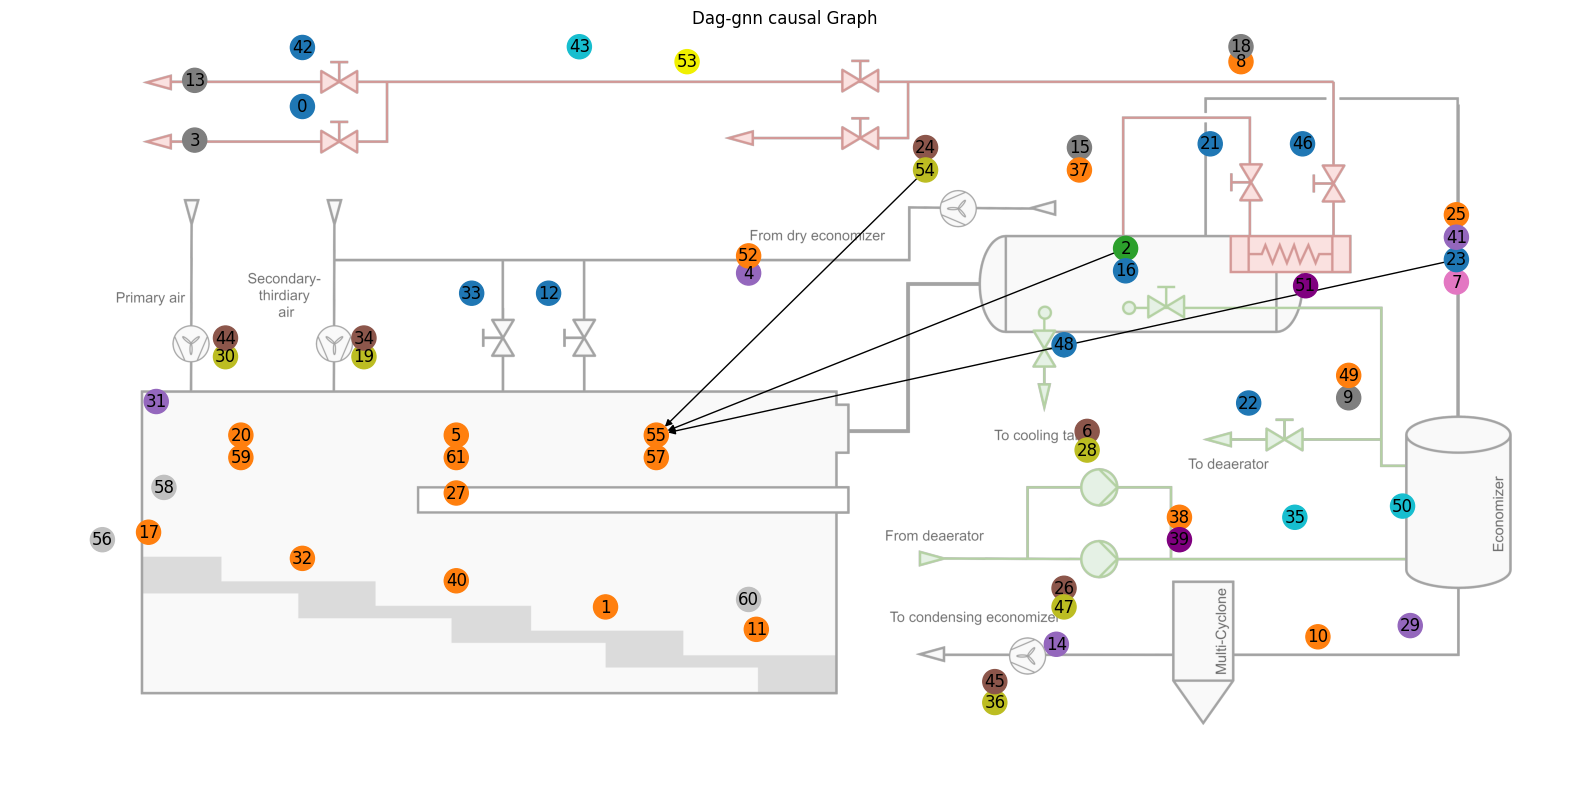

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/sensorlists.csv',index_col=0)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
adj=gnn.causal_matrix
G=nx.DiGraph()
G.add_nodes_from(range(len(adj)))

pos={}
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#c0c0c0', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#7f007f', '#f0f000']#d62728
c={}
for i in range(62):
  pos[i]=(df.iloc[i,1]*103,(df.iloc[i,2]+1)*50)
  c[i]=colors[int(df.iloc[i,3])]

plt.figure(figsize=(20,20))
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/amir/ESAS/Boiler/EA - Dashboard Boiler scada view_files/6465')
img[:,:,3]= img[:,:,3]-0.4
plt.imshow(img)
nx.draw(G,pos,node_color=c.values(),with_labels=True)
cnt=0
for i in range(len(adj)):
  for j in range(len(adj)):
    if df.iloc[i,0]=='push bk2wincc:bk2:K2E1-BT1_MV' or\
    df.iloc[i,0]=='push bk2wincc:bk2:K2E1-BT3_MV' or\
    df.iloc[j,0]=='push bk2wincc:bk2:K2E1-BT1_MV' or\
    df.iloc[j,0]=='push bk2wincc:bk2:K2E1-BT3_MV': 
      if adj[i,j]==1:
        G.add_edge(i,j,weight=adj[i,j])
        cnt+=1
print(cnt)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
plt.title('Dag-gnn causal Graph')

With few edges, this graph doesn't give us much information. A solution might be to use a longer period of data, but this will increase the computational complexity.

## NotearsNonlinear (NTNL)
Directed acyclic graphical model with $d$ nodes defines a distribution of random vector of size $d$. We are interested in the Bayesian Network Structure Learning (BNSL) problem: given $n$ samples from such distribution, how to estimate the graph $G$?

A major challenge of BNSL is enforcing the directed acyclic graph (DAG) constraint, which is combinatorial. While existing approaches rely on local heuristics, we introduce a fundamentally different strategy: we formulate it as a purely continuous optimization problem over real matrices that avoids this combinatorial constraint entirely. 

In other words,

$$
\min_{G}\quad score(G)
\text{ s.t. } G\in \text{DAG}s\\

\Leftrightarrow

\min_{W\in\mathbb{R}^{d \times d}}\quad score(W)
\text{ s.t. } h(W)=0
$$

where $h$ is a smooth function whose level set exactly characterizes the space of DAGs.





 In the code cell below, we implement NTNL using Gcastle library and display the obtained causal graph.

In [ ]:
import os
os.environ['CASTLE_BACKEND'] = 'pytorch'  

from castle.common import GraphDAG
from castle.algorithms import NotearsNonlinear



import pandas as pd

X = pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/data.csv',index_col=None,header=None).to_numpy()
# notears-nonlinear learn
nt = NotearsNonlinear(device_type='gpu')
nt.learn(X[-100:,:])

# plot dag
GraphDAG(nt.causal_matrix)

336


Text(0.5, 1.0, 'NotearsNonlinear causal Graph')

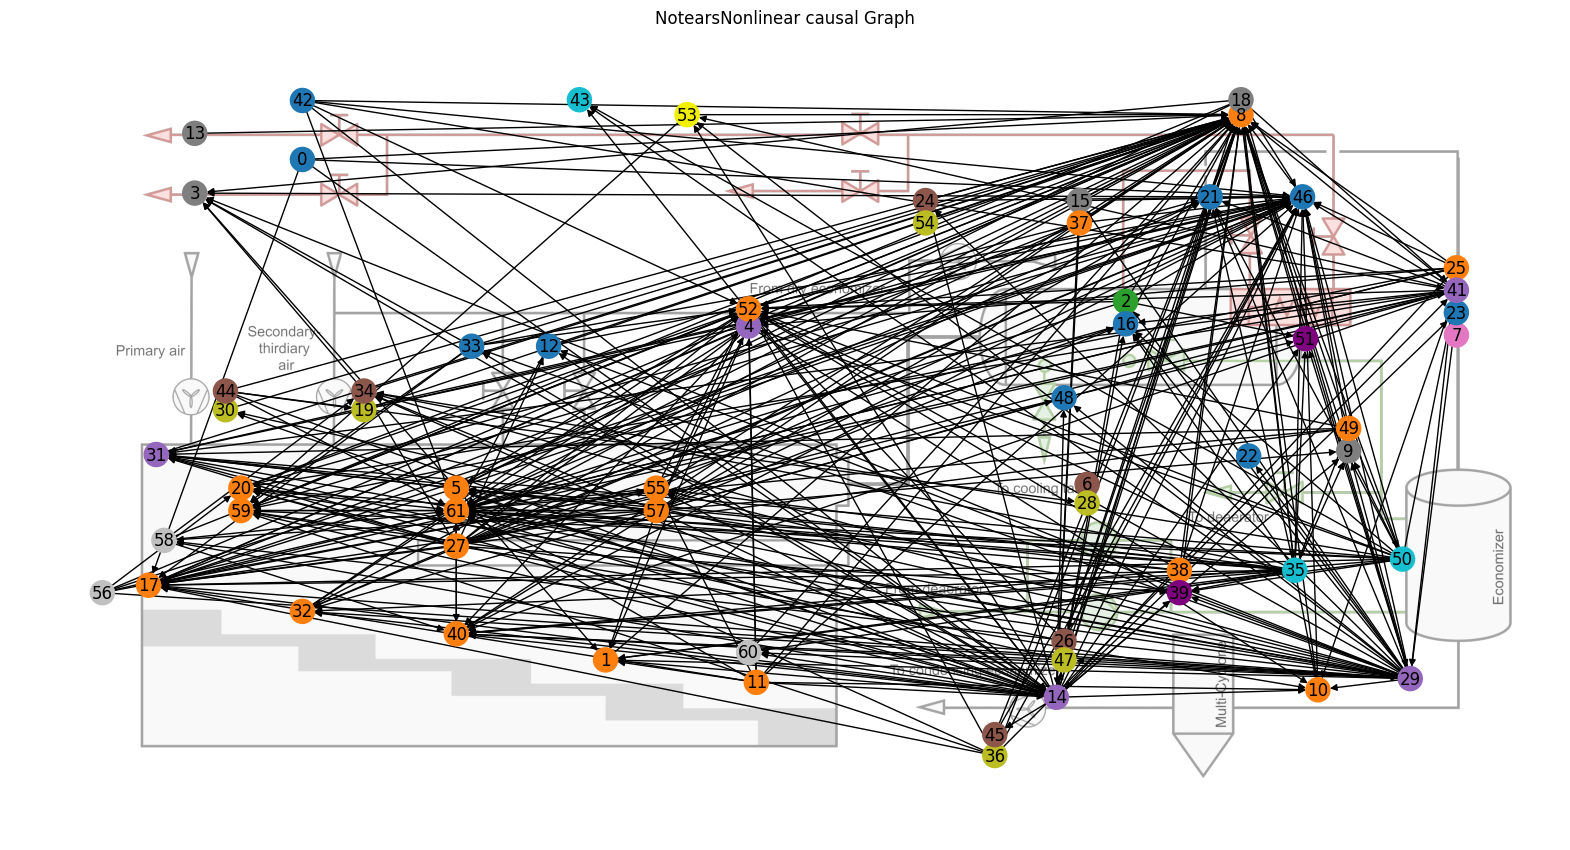

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/sensorlists.csv',index_col=0)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# adj=nt.causal_matrix
adj=np.load('/content/drive/MyDrive/amir/ESAS/Boiler/esas-ntnl-adj.npy')
G=nx.DiGraph()
G.add_nodes_from(range(len(adj)))

pos={}
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#c0c0c0', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#7f007f', '#f0f000']#d62728
c={}
for i in range(62):
  pos[i]=(df.iloc[i,1]*103,(df.iloc[i,2]+1)*50)
  c[i]=colors[int(df.iloc[i,3])]

plt.figure(figsize=(20,20))
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/amir/ESAS/Boiler/EA - Dashboard Boiler scada view_files/6465')
img[:,:,3]= img[:,:,3]-0.4
plt.imshow(img)

nx.draw(G,pos,node_color=c.values(),with_labels=True)
cnt=0
for i in range(len(adj)):
  for j in range(len(adj)):
    if adj[i,j]==1:
      G.add_edge(i,j,weight=adj[i,j])
      cnt+=1
print(cnt)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
plt.title('NotearsNonlinear causal Graph')

The **NTNL Causal Graph** is shown above. Like before, in order to further analyze it, we filter it first for sensor number 29 and then for two target sensors in the burner 20 and 55.

38


Text(0.5, 1.0, 'NotearsNonlinear causal Graph')

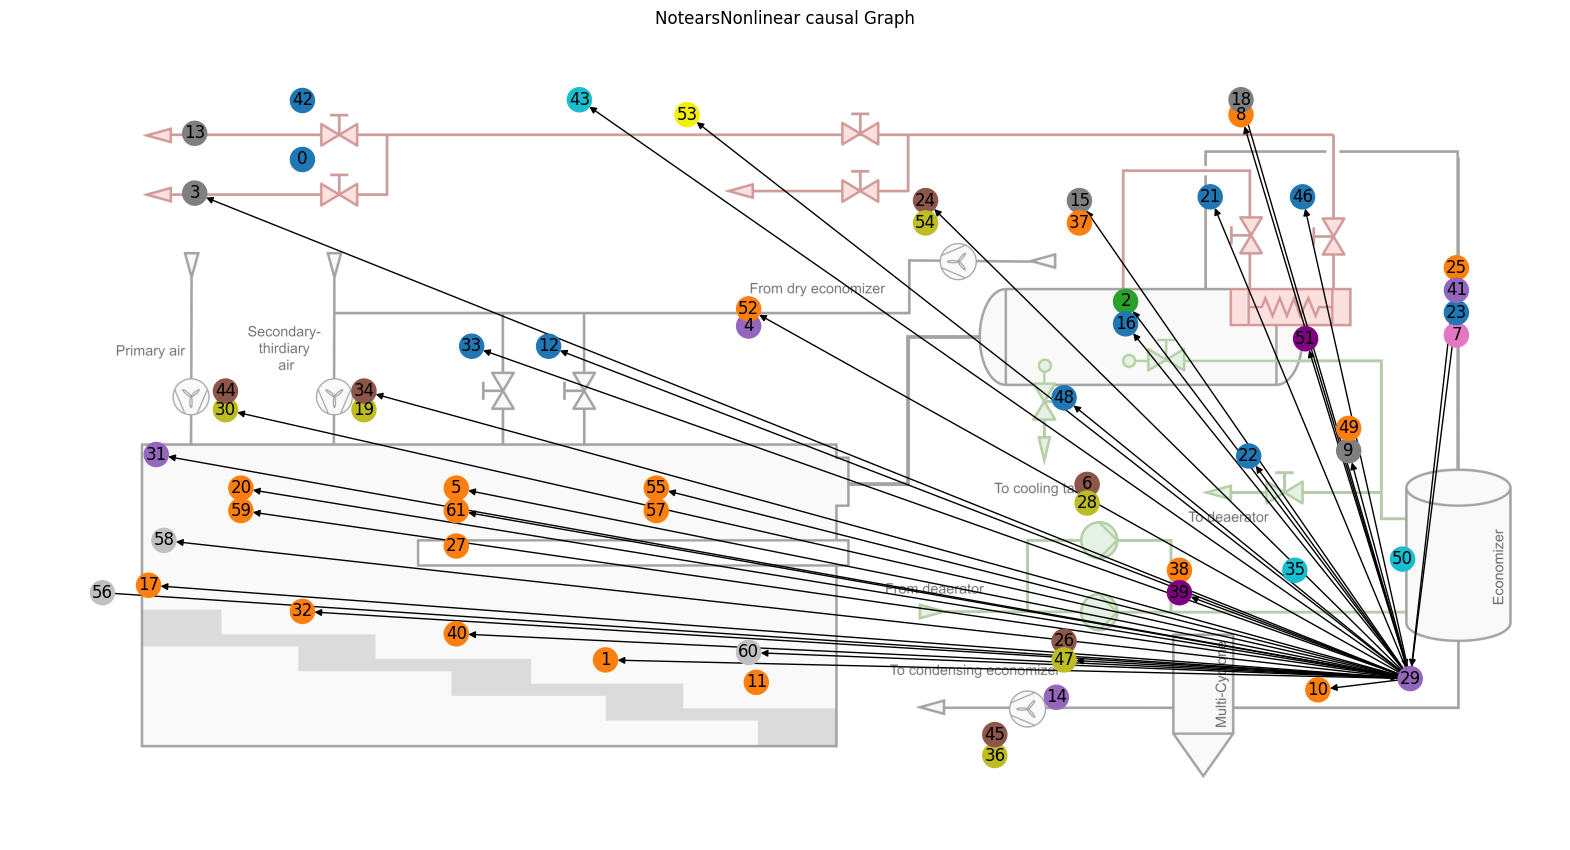

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/sensorlists.csv',index_col=0)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# adj=nt.causal_matrix
G=nx.DiGraph()
G.add_nodes_from(range(len(adj)))

pos={}
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#c0c0c0', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#7f007f', '#f0f000']#d62728
c={}
for i in range(62):
  pos[i]=(df.iloc[i,1]*103,(df.iloc[i,2]+1)*50)
  c[i]=colors[int(df.iloc[i,3])]

plt.figure(figsize=(20,20))
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/amir/ESAS/Boiler/EA - Dashboard Boiler scada view_files/6465')
img[:,:,3]= img[:,:,3]-0.4
plt.imshow(img)
nx.draw(G,pos,node_color=c.values(),with_labels=True)
cnt=0
for i in range(len(adj)):
  for j in range(len(adj)):
    if df.iloc[i,0]=='push bk2wincc:bk2:K2W07-BP2_MV' or\
    df.iloc[j,0]=='push bk2wincc:bk2:K2W07-BP2_MV':
      if adj[i,j]==1:
        G.add_edge(i,j,weight=adj[i,j])
        cnt+=1
print(cnt)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
plt.title('NotearsNonlinear causal Graph')

The above figure shows only the NTNL filtered graph for sensor number 29. As a result of analysis and expert opinion, this graph represents the following links appropriately:

29 ---> 10

41---> 29

23 ---> 29

56  ----->  29

In order to check all the edges, we need to conduct a more detailed industrial examination.

In this particular instance, sensor 20, which measures the temperature inside the burner, can be considered as the inlet temperature. In contrast, sensor 55 can be considered the outlet temperature, which is sent to the boiler part.  The following is a DAG graph for these two sensors.

22


Text(0.5, 1.0, 'NotearsNonlinear causal Graph')

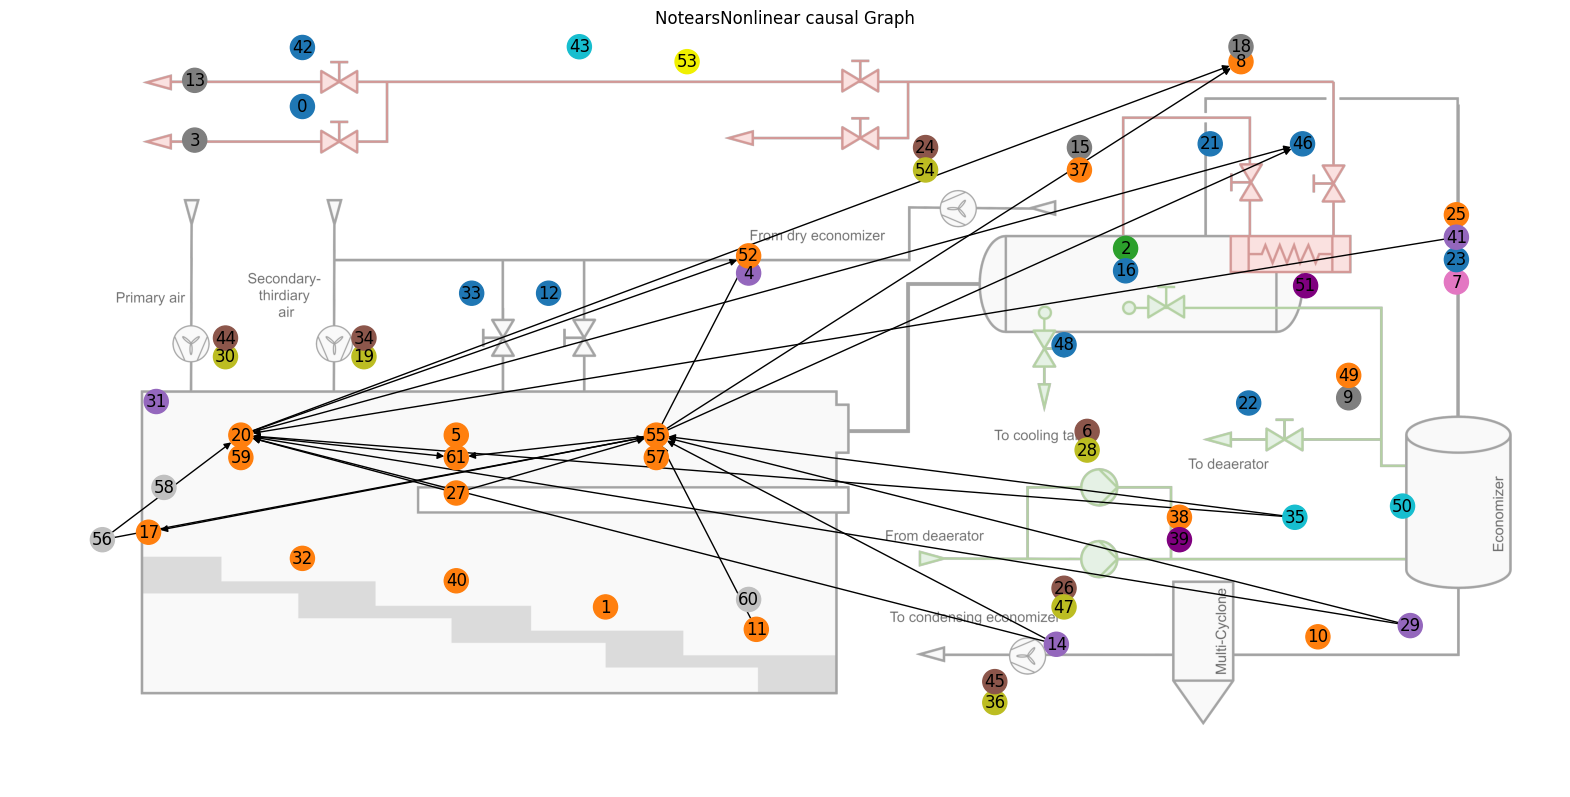

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/sensorlists.csv',index_col=0)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# adj=nt.causal_matrix
G=nx.DiGraph()
G.add_nodes_from(range(len(adj)))

pos={}
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#c0c0c0', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#7f007f', '#f0f000']#d62728
c={}
for i in range(62):
  pos[i]=(df.iloc[i,1]*103,(df.iloc[i,2]+1)*50)
  c[i]=colors[int(df.iloc[i,3])]

plt.figure(figsize=(20,20))
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/amir/ESAS/Boiler/EA - Dashboard Boiler scada view_files/6465')
img[:,:,3]= img[:,:,3]-0.4
plt.imshow(img)
nx.draw(G,pos,node_color=c.values(),with_labels=True)
cnt=0
for i in range(len(adj)):
  for j in range(len(adj)):
    if df.iloc[i,0]=='push bk2wincc:bk2:K2E1-BT1_MV' or\
    df.iloc[i,0]=='push bk2wincc:bk2:K2E1-BT3_MV' or\
    df.iloc[j,0]=='push bk2wincc:bk2:K2E1-BT1_MV' or\
    df.iloc[j,0]=='push bk2wincc:bk2:K2E1-BT3_MV': 
      if adj[i,j]==1:
        G.add_edge(i,j,weight=adj[i,j])
        cnt+=1
print(cnt)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
plt.title('NotearsNonlinear causal Graph')

As a result of analysis and expert opinion, NTNL causal graph represents the following links appropriately:

56---> 20

11 ---> 55

27---> 55

20---> 8

55---> 8

20---> 46

55---> 46

Often, a simple graph isn't sufficient, and we need a weighted graph. In the weighted graph, each sensor is given a weight depending on how it affects the other sensor. In the next method, we try to extract the weighted causality graph for this biomass boiler.

## Weighted DAG-GNN
To extract the weighted graph for this system, we used the DAG-GNN method. In this way, we have calculated the causality adjacency for 3 hours, in 30 minutes intervals. Then we take the average of these causality matrices. The main idea is that the weight of each link depends on the number of repetitions at different time intervals.

 In the code cell below, we implement weighted DAG-GNN using Gcastle library and display the obtained causal graph adjacency matrix.



1
2
3
4
5
6


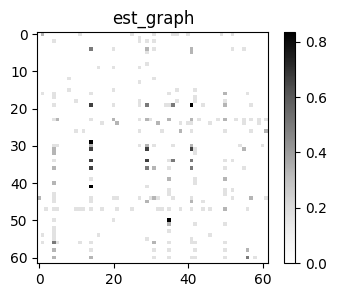

In [ ]:
import os
os.environ['CASTLE_BACKEND'] ='pytorch'

from castle.common import GraphDAG
from castle.algorithms import DAG_GNN


X = pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/data.csv',index_col=None,header=None).to_numpy()
# rl learn
causal_matrices=[]
for i in range(6):
  print(i+1)
  gnn = DAG_GNN(device_type='gpu')
  gnn.learn(X[i*30:(i+1)*30,:])
  causal_matrices.append(gnn.causal_matrix)

causal_matrix=np.mean(causal_matrices,axis=0)
# plot dag
GraphDAG(causal_matrix)


223


Text(0.5, 1.0, 'weighted Dag-gnn causal Graph')

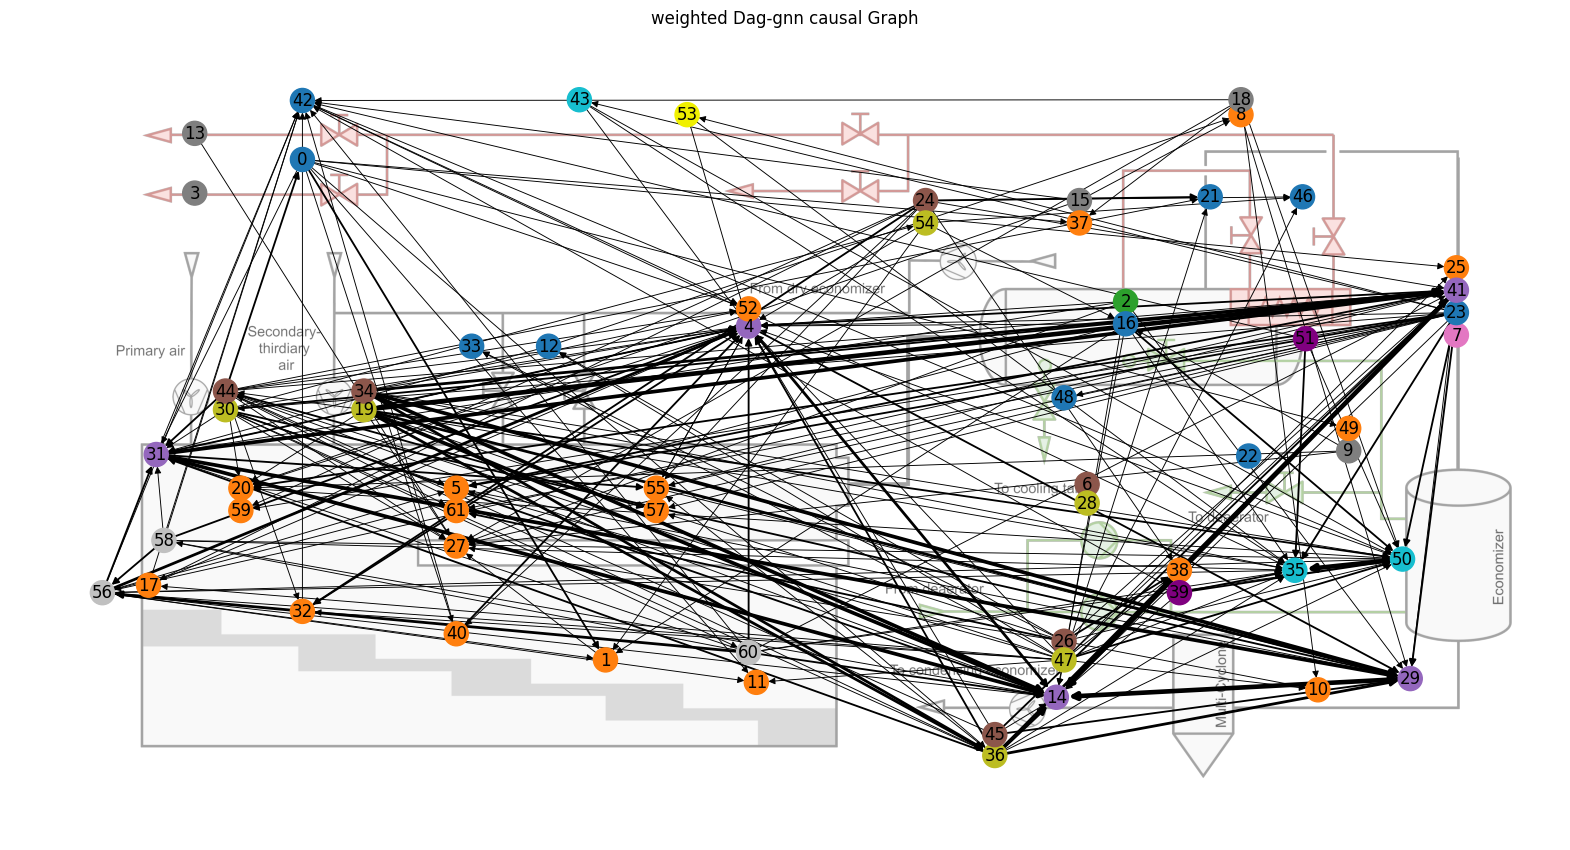

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/sensorlists.csv',index_col=0)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

adj=causal_matrix
G=nx.DiGraph()
G.add_nodes_from(range(len(adj)))
pos={}
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#c0c0c0', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#7f007f', '#f0f000']#d62728
c={}
for i in range(62):
  pos[i]=(df.iloc[i,1]*103,(df.iloc[i,2]+1)*50)
  c[i]=colors[int(df.iloc[i,3])]

plt.figure(figsize=(20,20))
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/amir/ESAS/Boiler/EA - Dashboard Boiler scada view_files/6465')
img[:,:,3]= img[:,:,3]-0.4
plt.imshow(img)


nx.draw(G,pos,node_color=c.values(),with_labels=True)
cnt=0
for i in range(len(adj)):
  for j in range(len(adj)):
    if adj[i,j]>0:
      G.add_edge(i,j,weight=adj[i,j])
      cnt+=1
print(cnt)

for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2]*4)
plt.title('weighted Dag-gnn causal Graph')

14


Text(0.5, 1.0, 'weighted Dag-gnn causal Graph')

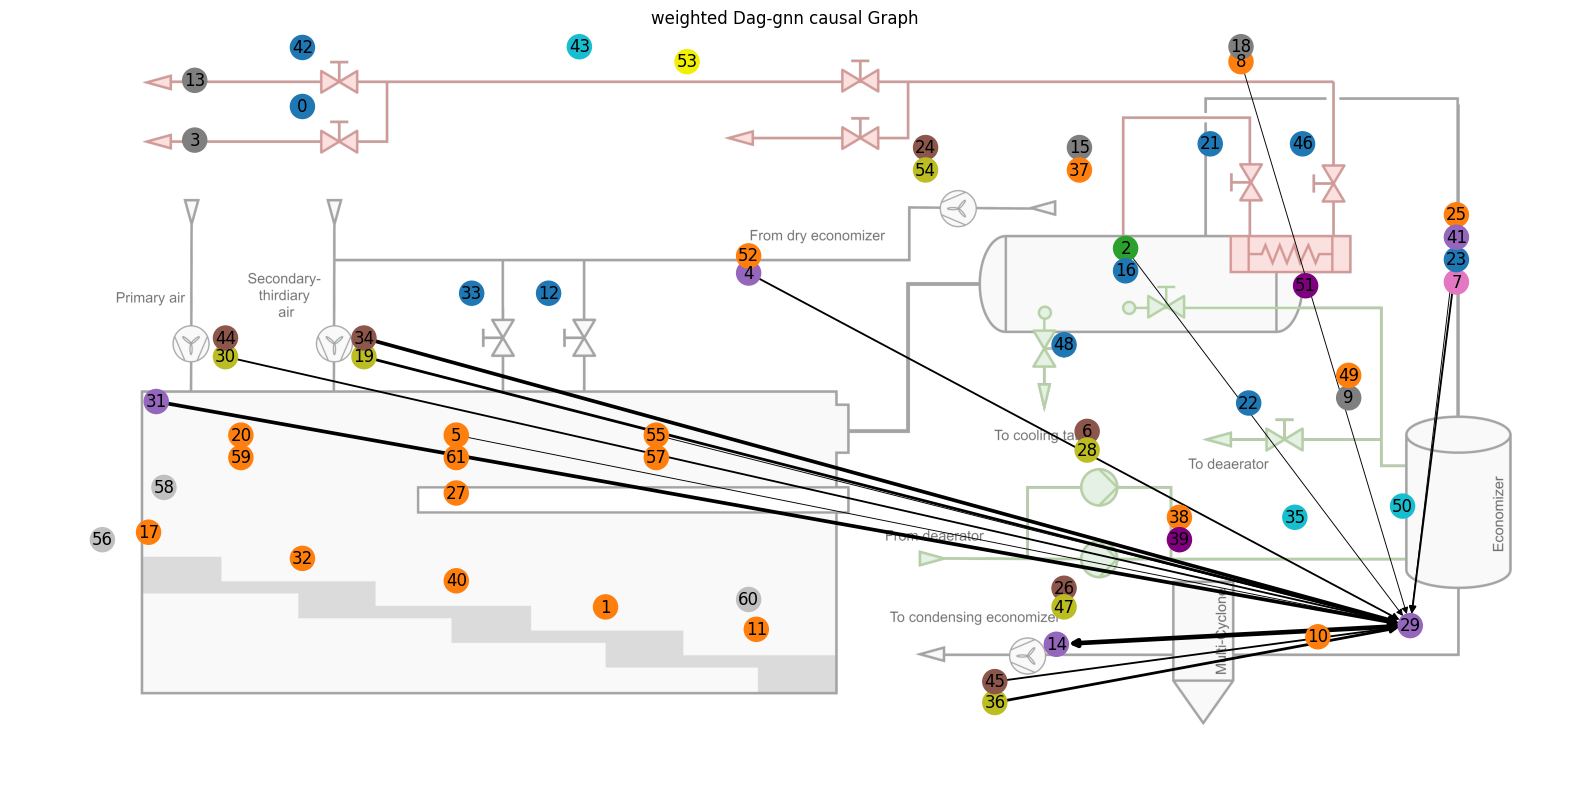

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/sensorlists.csv',index_col=0)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
adj=causal_matrix
G=nx.DiGraph()
G.add_nodes_from(range(len(adj)))

pos={}
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#c0c0c0', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#7f007f', '#f0f000']#d62728
c={}
for i in range(62):
  pos[i]=(df.iloc[i,1]*103,(df.iloc[i,2]+1)*50)
  c[i]=colors[int(df.iloc[i,3])]

plt.figure(figsize=(20,20))
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/amir/ESAS/Boiler/EA - Dashboard Boiler scada view_files/6465')
img[:,:,3]= img[:,:,3]-0.4
plt.imshow(img)
nx.draw(G,pos,node_color=c.values(),with_labels=True)
cnt=0
for i in range(len(adj)):
  for j in range(len(adj)):
    if df.iloc[i,0]=='push bk2wincc:bk2:K2W07-BP2_MV' or\
    df.iloc[j,0]=='push bk2wincc:bk2:K2W07-BP2_MV':
      if adj[i,j]>0:
        G.add_edge(i,j,weight=adj[i,j])
        cnt+=1
print(cnt)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2]*4)
plt.title('weighted Dag-gnn causal Graph')

The above figure shows only the weighted DAG-GNN filtered graph for sensor number 29. As a result of analysis and expert opinion, this graph represents the following links appropriately:

29 ---> 14

31---> 29

30---> 29

19  ----->29

34---> 29

41---> 29

23 ----->  29



15


Text(0.5, 1.0, 'weighted Dag-gnn causal Graph')

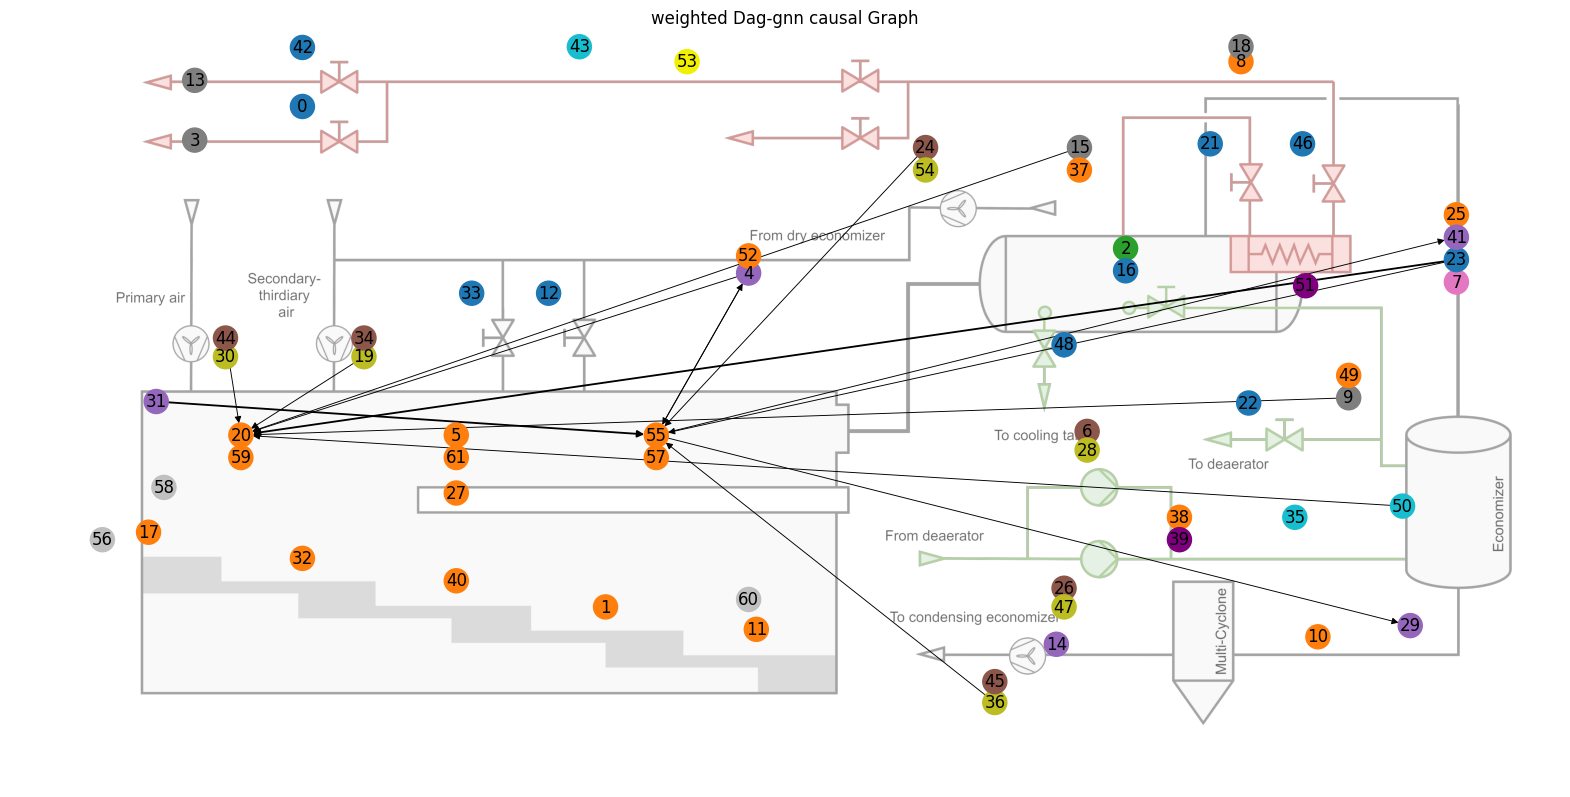

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/amir/ESAS/Boiler/sensorlists.csv',index_col=0)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
adj=causal_matrix
G=nx.DiGraph()
G.add_nodes_from(range(len(adj)))

pos={}
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#c0c0c0', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#7f007f', '#f0f000']#d62728
c={}
for i in range(62):
  pos[i]=(df.iloc[i,1]*103,(df.iloc[i,2]+1)*50)
  c[i]=colors[int(df.iloc[i,3])]

plt.figure(figsize=(20,20))
import matplotlib.image as mpimg
img=mpimg.imread('/content/drive/MyDrive/amir/ESAS/Boiler/EA - Dashboard Boiler scada view_files/6465')
img[:,:,3]= img[:,:,3]-0.4
plt.imshow(img)
nx.draw(G,pos,node_color=c.values(),with_labels=True)
cnt=0
for i in range(len(adj)):
  for j in range(len(adj)):
    if df.iloc[i,0]=='push bk2wincc:bk2:K2E1-BT1_MV' or\
    df.iloc[i,0]=='push bk2wincc:bk2:K2E1-BT3_MV' or\
    df.iloc[j,0]=='push bk2wincc:bk2:K2E1-BT1_MV' or\
    df.iloc[j,0]=='push bk2wincc:bk2:K2E1-BT3_MV': 
      if adj[i,j]>0:
        G.add_edge(i,j,weight=adj[i,j])
        cnt+=1
print(cnt)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2]*4)
plt.title('weighted Dag-gnn causal Graph')

Also for nodes number 20 and 55 we have:

30---> 20

19---> 20

4---> 20

31---> 55

55---> 41

55---> 29

In order to analyze all the edges, we definitely need more knowledge and experiments.


## Takeaways



* Depending on the type of data and application, different methods may give us different graphs and there is no best method for all data. In biomass boiler use case, based on our analysis, **Weighted DAG-GNN** gives us a more informative graph.
* To analyze the causal graph, we need expert knowledge.
* The time frame for extracting the causality graph should be in line with the process. By doing so, we can discover more suitable intersensor edges.



## What’s Next
* We can interpret the process using causal graphs, and knowing the relationship between sensors can assist us in making decisions. It is important to know these connections in case a problem arises in the course of the process. A good example of this would be **anomaly detection**.
* The causality graph can be used for further learning methods. For instance, in our proposed method we used the causal graph as an underlying graph in the graph neural network in order to improve our prediction for time series data in complex systems.


Miraki, et al., “**Causal-based Spatio-Temporal Graph Neural Networks for Industrial Internet of Things Multivariate Time Series Forecasting**”, eXplainable Artificial Intelligence (xAI 2023)

